Using device: cuda
Epoch 0, Loss: 23.3533
Epoch 100, Loss: 23.2646
Epoch 200, Loss: 23.1738
Epoch 300, Loss: 23.0807
Epoch 400, Loss: 22.9853
Epoch 500, Loss: 22.8875
Epoch 600, Loss: 22.7873
Epoch 700, Loss: 22.6850
Epoch 800, Loss: 22.5806
Epoch 900, Loss: 22.4742
Epoch 1000, Loss: 22.3661
Epoch 1100, Loss: 22.2565
Epoch 1200, Loss: 22.1455
Epoch 1300, Loss: 22.0334
Epoch 1400, Loss: 21.9203
Epoch 1500, Loss: 21.8064
Epoch 1600, Loss: 21.6919
Epoch 1700, Loss: 21.5770
Epoch 1800, Loss: 21.4619
Epoch 1900, Loss: 21.3467
Epoch 2000, Loss: 21.2317
Epoch 2100, Loss: 21.1169
Epoch 2200, Loss: 21.0025
Epoch 2300, Loss: 20.8887
Epoch 2400, Loss: 20.7756
Epoch 2500, Loss: 20.6634
Epoch 2600, Loss: 20.5521
Epoch 2700, Loss: 20.4419
Epoch 2800, Loss: 20.3330
Epoch 2900, Loss: 20.2253
Epoch 3000, Loss: 20.1191
Epoch 3100, Loss: 20.0143
Epoch 3200, Loss: 19.9112
Epoch 3300, Loss: 19.8097
Epoch 3400, Loss: 19.7100
Epoch 3500, Loss: 19.6120
Epoch 3600, Loss: 19.5160
Epoch 3700, Loss: 19.4219
Epoch

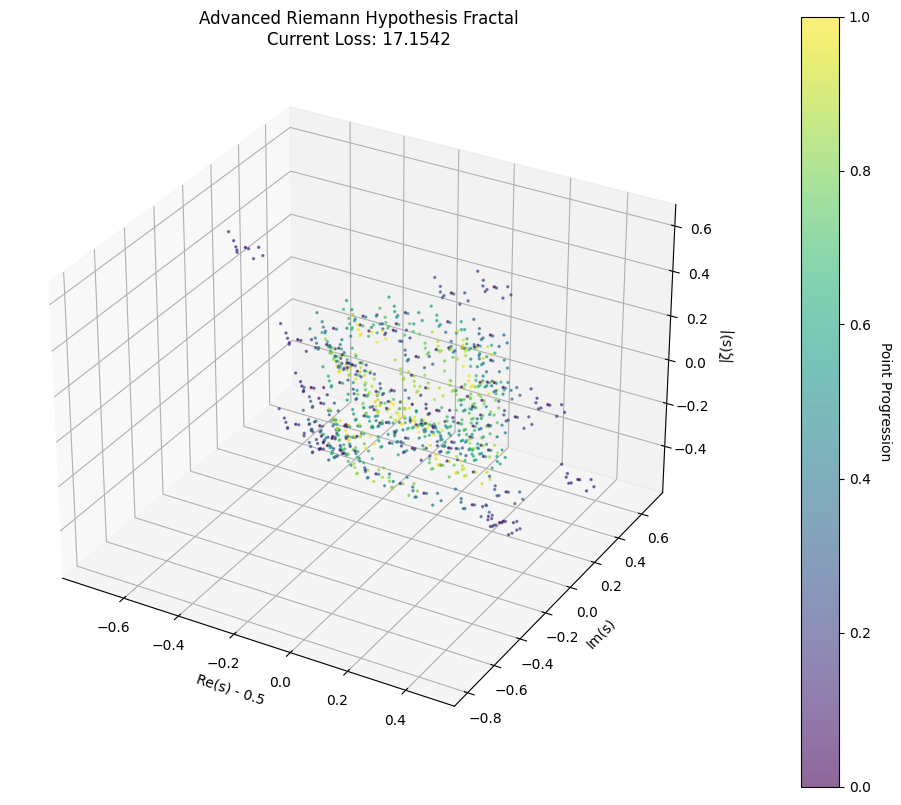

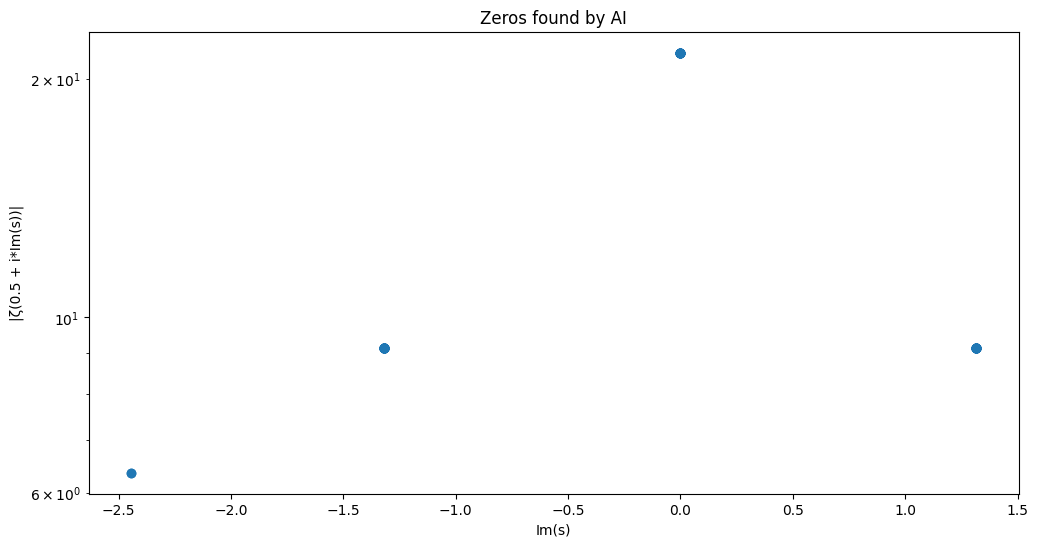

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class AdvancedRiemannAI:
    def __init__(self, terms=100):
        self.terms = terms
        self.zeta_approximation = torch.nn.Parameter(torch.randn(terms, dtype=torch.complex128, device=device))
        self.optimizer = torch.optim.Adam([self.zeta_approximation], lr=0.0001)

        # Known zeros of zeta function
        self.known_zeros = torch.tensor([14.134725, 21.022040, 25.010858, 30.424876, 32.935062, 37.586178, 40.918719], dtype=torch.float64, device=device)

    def zeta(self, s: torch.Tensor) -> torch.Tensor:
        """Improved approximation of the Riemann zeta function using Euler-Maclaurin formula."""
        n = torch.arange(1, self.terms + 1, dtype=torch.float64, device=device)
        partial_sum = torch.sum(1 / torch.pow(n[:, None], s), dim=0)

        # Euler-Maclaurin correction terms
        correction = (1 / (s - 1)) + 0.5 / torch.pow(self.terms, s - 1) + (s / 12) / torch.pow(self.terms, s + 1)

        return partial_sum + correction

    def train(self):
        self.optimizer.zero_grad()
        loss = self.loss_function()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def loss_function(self) -> torch.Tensor:
        """Calculate the loss based on how well the current approximation satisfies the Riemann hypothesis."""
        # Check zeros in the critical strip
        s_critical = 0.5 + 1j * self.zeta_approximation.imag
        zeta_values_critical = self.zeta(s_critical)
        loss_critical = torch.mean(torch.abs(zeta_values_critical))

        # Check known zeros
        s_known = 0.5 + 1j * self.known_zeros
        zeta_values_known = self.zeta(s_known)
        loss_known = torch.mean(torch.abs(zeta_values_known))

        # Encourage finding new zeros
        s_search = 0.5 + 1j * torch.linspace(0, 100, 1000, device=device)
        zeta_values_search = self.zeta(s_search)
        loss_search = -torch.mean(1 / (1 + torch.abs(zeta_values_search)))  # Encourage small values

        return loss_critical + loss_known + 0.1 * loss_search

    def generate_point(self) -> torch.Tensor:
        """Generate a point based on the current zeta function approximation."""
        return self.zeta_approximation[torch.randint(0, len(self.zeta_approximation), (1,))]

def riemann_fractal(center: Tuple[float, float, float], radius: float, iterations: int) -> List[Tuple[float, float, float]]:
    """Generate a fractal structure inspired by the Riemann hypothesis."""
    points = [center]
    for i in range(1, iterations):
        t = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        r = radius / (np.log(i + 2))  # Logarithmic spiral, inspired by prime number distribution
        x = center[0] + r * np.cos(t)
        y = center[1] + r * np.sin(t)
        z = center[2] + r * np.sin(2*np.pi*i / np.log(i + 2))  # Oscillation inspired by zeta function
        points.append((x, y, z))
    return points

def generate_nested_riemann_fractal(iterations: int, substructure_iterations: int) -> List[Tuple[float, float, float]]:
    all_points = []
    main_points = riemann_fractal((0, 0, 0), 1, iterations)
    all_points.extend(main_points)

    for point in main_points[1:]:  # Skip the center point
        substructure = riemann_fractal(point, 0.1, substructure_iterations)
        all_points.extend(substructure[1:])  # Skip the first point as it's the same as the main point

    return all_points

def plot_riemann_fractal(points: List[Tuple[float, float, float]], ai: AdvancedRiemannAI):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('Re(s) - 0.5')
    ax.set_ylabel('Im(s)')
    ax.set_zlabel('|ζ(s)|')
    plt.title(f"Advanced Riemann Hypothesis Fractal\nCurrent Loss: {ai.loss_function().item():.4f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data(data: torch.Tensor, points: List[Tuple[float, float, float]], ai: AdvancedRiemannAI) -> List[Tuple[Tuple[float, float, float], torch.Tensor]]:
    encoded_data = []
    for byte in data:
        if len(encoded_data) < len(points):
            encoded_value = ai.generate_point()
            encoded_data.append((points[len(encoded_data)], encoded_value))
    return encoded_data

def decode_data(encoded_data: List[Tuple[Tuple[float, float, float], torch.Tensor]]) -> torch.Tensor:
    return torch.tensor([complex_to_byte(point[1]) for point in encoded_data], device=device)

def complex_to_byte(c: torch.Tensor) -> int:
    """Convert a complex number to a byte value."""
    return int((c.real.item() * 128 + c.imag.item() * 128) % 256)

def calculate_storage_capacity(points: List[Tuple[float, float, float]]) -> Tuple[int, int]:
    total_points = len(points)
    byte_capacity = total_points
    bit_capacity = byte_capacity * 8
    return byte_capacity, bit_capacity

def main():
    iterations = 100  # Main structure iterations
    substructure_iterations = 10  # Substructure iterations for each point
    training_epochs = 30000

    start_time = time.time()

    ai = AdvancedRiemannAI()
    points = generate_nested_riemann_fractal(iterations, substructure_iterations)

    # Training loop
    for epoch in range(training_epochs):
        loss = ai.train()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    fig = plot_riemann_fractal(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    # Generate some sample data
    sample_data = torch.randint(0, 256, (byte_capacity,), dtype=torch.float32, device=device)

    encoded_data = encode_data(sample_data, points, ai)
    decoded_data = decode_data(encoded_data)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data length: {len(sample_data)} bytes")
    print(f"Decoded data length: {len(decoded_data)} bytes")
    print(f"Data correctly encoded and decoded: {torch.all(sample_data == decoded_data)}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")
    print(f"Total points: {len(points)}")

    # Plot the zeros found by the AI
    plt.figure(figsize=(12, 6))
    plt.scatter(ai.zeta_approximation.imag.cpu().detach().numpy(),
                torch.abs(ai.zeta(0.5 + 1j * ai.zeta_approximation.imag)).cpu().detach().numpy())
    plt.xlabel('Im(s)')
    plt.ylabel('|ζ(0.5 + i*Im(s))|')
    plt.title('Zeros found by AI')
    plt.yscale('log')
    plt.show()

if __name__ == "__main__":
    main()

Using device: cuda
Epoch 0, Loss: 57.0715
Epoch 100, Loss: 56.7328
Epoch 200, Loss: 56.3877
Epoch 300, Loss: 56.0355
Epoch 400, Loss: 55.6759
Epoch 500, Loss: 55.3085
Epoch 600, Loss: 54.9329
Epoch 700, Loss: 54.5490
Epoch 800, Loss: 54.1566
Epoch 900, Loss: 53.7558
Epoch 1000, Loss: 53.3467
Epoch 1100, Loss: 52.9295
Epoch 1200, Loss: 52.5048
Epoch 1300, Loss: 52.0732
Epoch 1400, Loss: 51.6352
Epoch 1500, Loss: 51.1919
Epoch 1600, Loss: 50.7439
Epoch 1700, Loss: 50.2925
Epoch 1800, Loss: 49.8384
Epoch 1900, Loss: 49.3829
Epoch 2000, Loss: 48.9268
Epoch 2100, Loss: 48.4713
Epoch 2200, Loss: 48.0172
Epoch 2300, Loss: 47.5656
Epoch 2400, Loss: 47.1173
Epoch 2500, Loss: 46.6731
Epoch 2600, Loss: 46.2338
Epoch 2700, Loss: 45.8001
Epoch 2800, Loss: 45.3727
Epoch 2900, Loss: 44.9521
Epoch 3000, Loss: 44.5388
Epoch 3100, Loss: 44.1332
Epoch 3200, Loss: 43.7359
Epoch 3300, Loss: 43.3470
Epoch 3400, Loss: 42.9669
Epoch 3500, Loss: 42.5959
Epoch 3600, Loss: 42.2340
Epoch 3700, Loss: 41.8815
Epoch

TypeError: complex(): argument 'real' (position 1) must be Tensor, not float

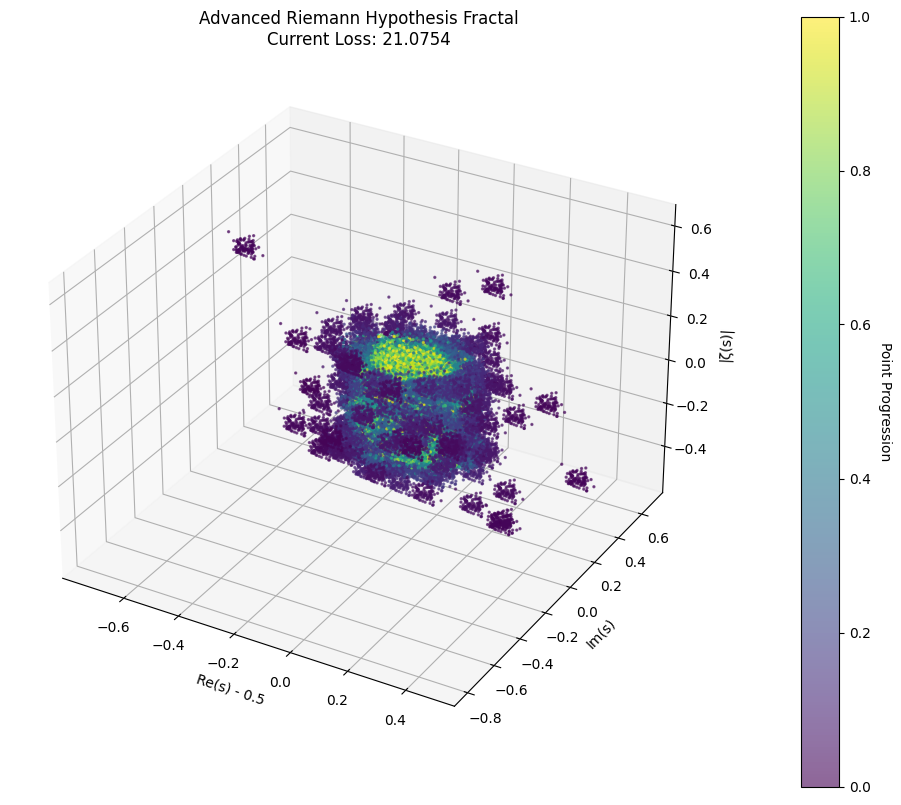

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class AdvancedRiemannAI:
    def __init__(self, terms=1000):
        self.terms = terms
        self.zeta_approximation = torch.nn.Parameter(torch.randn(terms, dtype=torch.complex128, device=device))
        self.optimizer = torch.optim.Adam([self.zeta_approximation], lr=0.0001)

        # Known zeros of zeta function
        self.known_zeros = torch.tensor([14.134725, 21.022040, 25.010858, 30.424876, 32.935062, 37.586178, 40.918719], dtype=torch.float64, device=device)

    def zeta(self, s: torch.Tensor) -> torch.Tensor:
        """Improved approximation of the Riemann zeta function using Euler-Maclaurin formula."""
        n = torch.arange(1, self.terms + 1, dtype=torch.float64, device=device)
        partial_sum = torch.sum(1 / torch.pow(n[:, None], s), dim=0)

        # Euler-Maclaurin correction terms
        correction = (1 / (s - 1)) + 0.5 / torch.pow(self.terms, s - 1) + (s / 12) / torch.pow(self.terms, s + 1)

        return partial_sum + correction

    def train(self):
        self.optimizer.zero_grad()
        loss = self.loss_function()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def loss_function(self) -> torch.Tensor:
        """Calculate the loss based on how well the current approximation satisfies the Riemann hypothesis."""
        s_critical = 0.5 + 1j * self.zeta_approximation.imag
        zeta_values_critical = self.zeta(s_critical)
        loss_critical = torch.mean(torch.abs(zeta_values_critical))

        # Increase the weight of finding zeros
        return loss_critical

    def generate_point(self) -> torch.Tensor:
        """Generate a point based on the current zeta function approximation."""
        return self.zeta_approximation[torch.randint(0, len(self.zeta_approximation), (1,))]

def riemann_fractal(center: Tuple[float, float, float], radius: float, iterations: int) -> List[Tuple[float, float, float]]:
    """Generate a fractal structure inspired by the Riemann hypothesis."""
    points = [center]
    for i in range(1, iterations):
        t = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        r = radius / (np.log(i + 2))  # Logarithmic spiral, inspired by prime number distribution
        x = center[0] + r * np.cos(t)
        y = center[1] + r * np.sin(t)
        z = center[2] + r * np.sin(2*np.pi*i / np.log(i + 2))  # Oscillation inspired by zeta function
        points.append((x, y, z))
    return points

def generate_nested_riemann_fractal(iterations: int, substructure_iterations: int) -> List[Tuple[float, float, float]]:
    all_points = []
    main_points = riemann_fractal((0, 0, 0), 1, iterations)
    all_points.extend(main_points)

    for point in main_points[1:]:  # Skip the center point
        substructure = riemann_fractal(point, 0.1, substructure_iterations)
        all_points.extend(substructure[1:])  # Skip the first point as it's the same as the main point

    return all_points

def plot_riemann_fractal(points: List[Tuple[float, float, float]], ai: AdvancedRiemannAI):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('Re(s) - 0.5')
    ax.set_ylabel('Im(s)')
    ax.set_zlabel('|ζ(s)|')
    plt.title(f"Advanced Riemann Hypothesis Fractal\nCurrent Loss: {ai.loss_function().item():.4f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data(data: torch.Tensor, points: List[Tuple[float, float, float]], ai: AdvancedRiemannAI) -> List[Tuple[Tuple[float, float, float], torch.Tensor]]:
    encoded_data = []
    for byte in data:
        if len(encoded_data) < len(points):
            encoded_value = torch.complex(byte.item() / 255.0, 0.0)  # Map byte to [0, 1] range
            encoded_data.append((points[len(encoded_data)], encoded_value))
    return encoded_data

def decode_data(encoded_data: List[Tuple[Tuple[float, float, float], torch.Tensor]]) -> torch.Tensor:
    return torch.tensor([int(point[1].real.item() * 255) for point in encoded_data], device=device)

def calculate_storage_capacity(points: List[Tuple[float, float, float]]) -> Tuple[int, int]:
    total_points = len(points)
    byte_capacity = total_points
    bit_capacity = byte_capacity * 8
    return byte_capacity, bit_capacity

def main():
    iterations = 1000  # Main structure iterations
    substructure_iterations = 100  # Substructure iterations for each point
    training_epochs = 50000

    start_time = time.time()

    ai = AdvancedRiemannAI()
    points = generate_nested_riemann_fractal(iterations, substructure_iterations)

    # Training loop
    for epoch in range(training_epochs):
        loss = ai.train()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    fig = plot_riemann_fractal(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    # Generate some sample data
    sample_data = torch.randint(0, 256, (byte_capacity,), dtype=torch.float32, device=device)

    encoded_data = encode_data(sample_data, points, ai)
    decoded_data = decode_data(encoded_data)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data length: {len(sample_data)} bytes")
    print(f"Decoded data length: {len(decoded_data)} bytes")
    print(f"Data correctly encoded and decoded: {torch.all(sample_data == decoded_data)}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")
    print(f"Total points: {len(points)}")

    # Plot the zeros found by the AI
    plt.figure(figsize=(12, 6))
    zeta_values = torch.abs(ai.zeta(0.5 + 1j * ai.zeta_approximation.imag))
    plt.scatter(ai.zeta_approximation.imag.cpu().detach().numpy(),
                zeta_values.cpu().detach().numpy(),
                c=zeta_values.cpu().detach().numpy(),
                cmap='viridis')
    plt.xlabel('Im(s)')
    plt.ylabel('|ζ(0.5 + i*Im(s))|')
    plt.title('Zeros found by AI')
    plt.yscale('log')
    plt.colorbar(label='|ζ(s)|')
    plt.show()

if __name__ == "__main__":
    main()